In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [2]:
print(sklearn.__version__)

0.21.3


In [3]:
advertising = pd.read_csv("dataset/Advertising.csv", index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


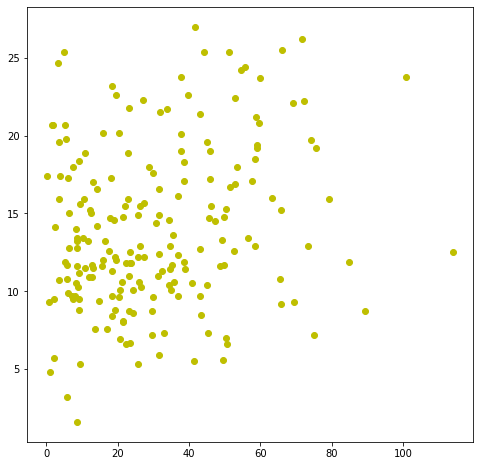

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising['newspaper'], advertising['sales'], c='y')

plt.show()

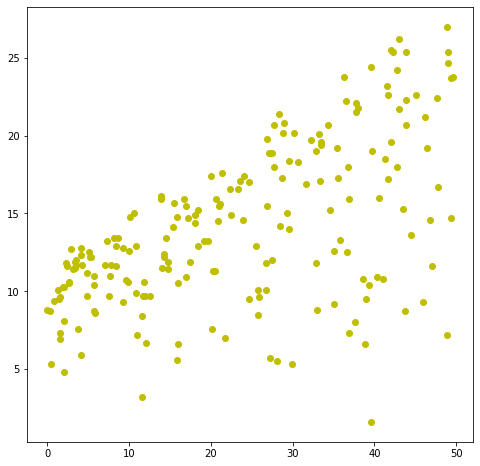

In [7]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising['radio'], advertising['sales'], c='y')

plt.show()

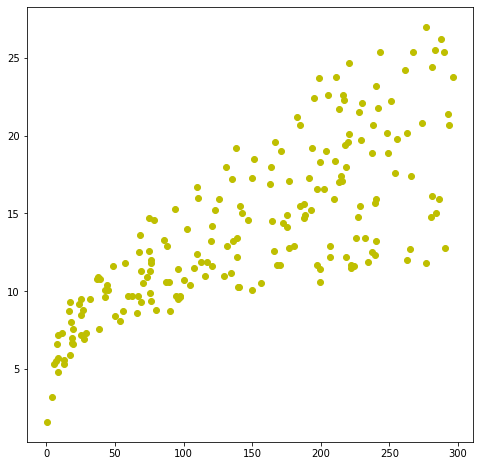

In [8]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising['TV'], advertising['sales'], c='y')

plt.show()

In [9]:
ads_data_correlation = advertising.corr()
ads_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


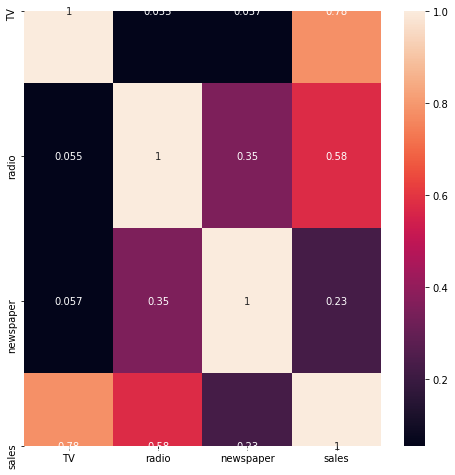

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(ads_data_correlation, annot=True)

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [23]:
X = advertising['TV'].values.reshape(-1,1)

Y = advertising['sales'].values.reshape(-1,1)

In [24]:
X.shape, Y.shape

((200, 1), (200, 1))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state =0)

In [26]:
x_train.shape, y_train.shape

((140, 1), (140, 1))

In [27]:
x_test.shape, y_test.shape

((60, 1), (60, 1))

In [28]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.76e-26
Time:                        21:17:39   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [29]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [30]:
print("Training Score: ", linear_reg.score(x_train, y_train))

Training Score:  0.5552336104251212


In [31]:
y_pred = linear_reg.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

print("Testing Score: ", r2_score(y_test, y_pred))

Testing Score:  0.725606346597073


In [33]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1])
    
    return adj_r_square

In [34]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.725606346597073


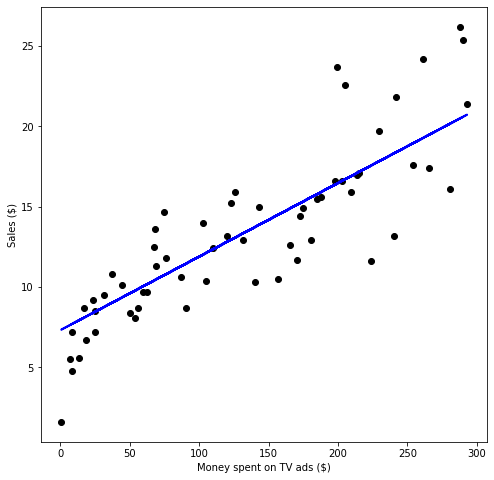

In [35]:
plt.figure(figsize=(8,8))

plt.scatter(x_test,
           y_test,
           c='black')

plt.plot(x_test,
        y_pred,
        c='blue',
        linewidth= 2)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

plt.show()

In [36]:
X = advertising.drop('sales', axis=1)
Y = advertising['sales']

In [37]:
X.head(5)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [38]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [40]:
 x_train.shape, y_train.shape

((140, 3), (140,))

In [41]:
x_test.shape, y_test.shape

((60, 3), (60,))

In [42]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     403.0
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.89e-67
Time:                        21:36:21   Log-Likelihood:                -271.40
No. Observations:                 140   AIC:                             550.8
Df Residuals:                     136   BIC:                             562.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9536      0.367      8.042      0.0

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [44]:
print("Training Score : ", linear_reg.score(x_train, y_train))

Training Score :  0.8988830054081904


In [45]:
y_pred = linear_reg.predict(x_test)

In [46]:
print("Testing Score : ", r2_score(y_test, y_pred))

Testing Score :  0.8897030763964173


In [47]:
r2 =  r2_score(y_test, y_pred)

print("Adjusted_r2_score : ", adjusted_r2(r2, y_test, x_test))

Adjusted_r2_score :  0.8858330089015548
